<div style="background-color: white; color: black;padding: 10px; border-radius: 5px;">

**Date Published:** December 29, 2024  **Author:** Adnan Alaref

</div>

# **◍ PyTorch Workflow**

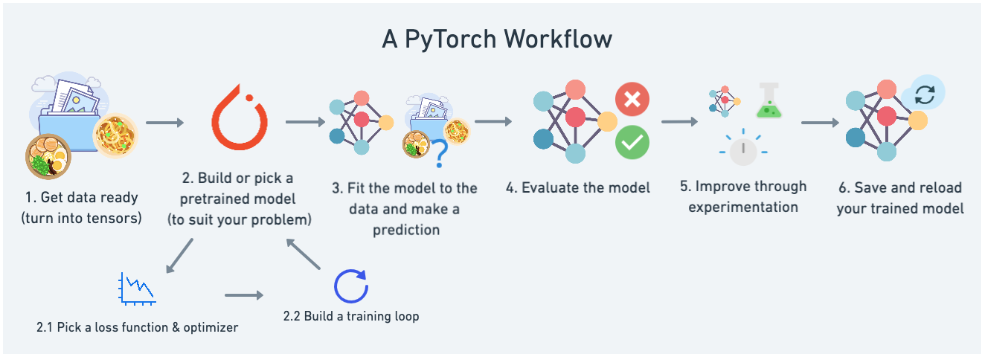

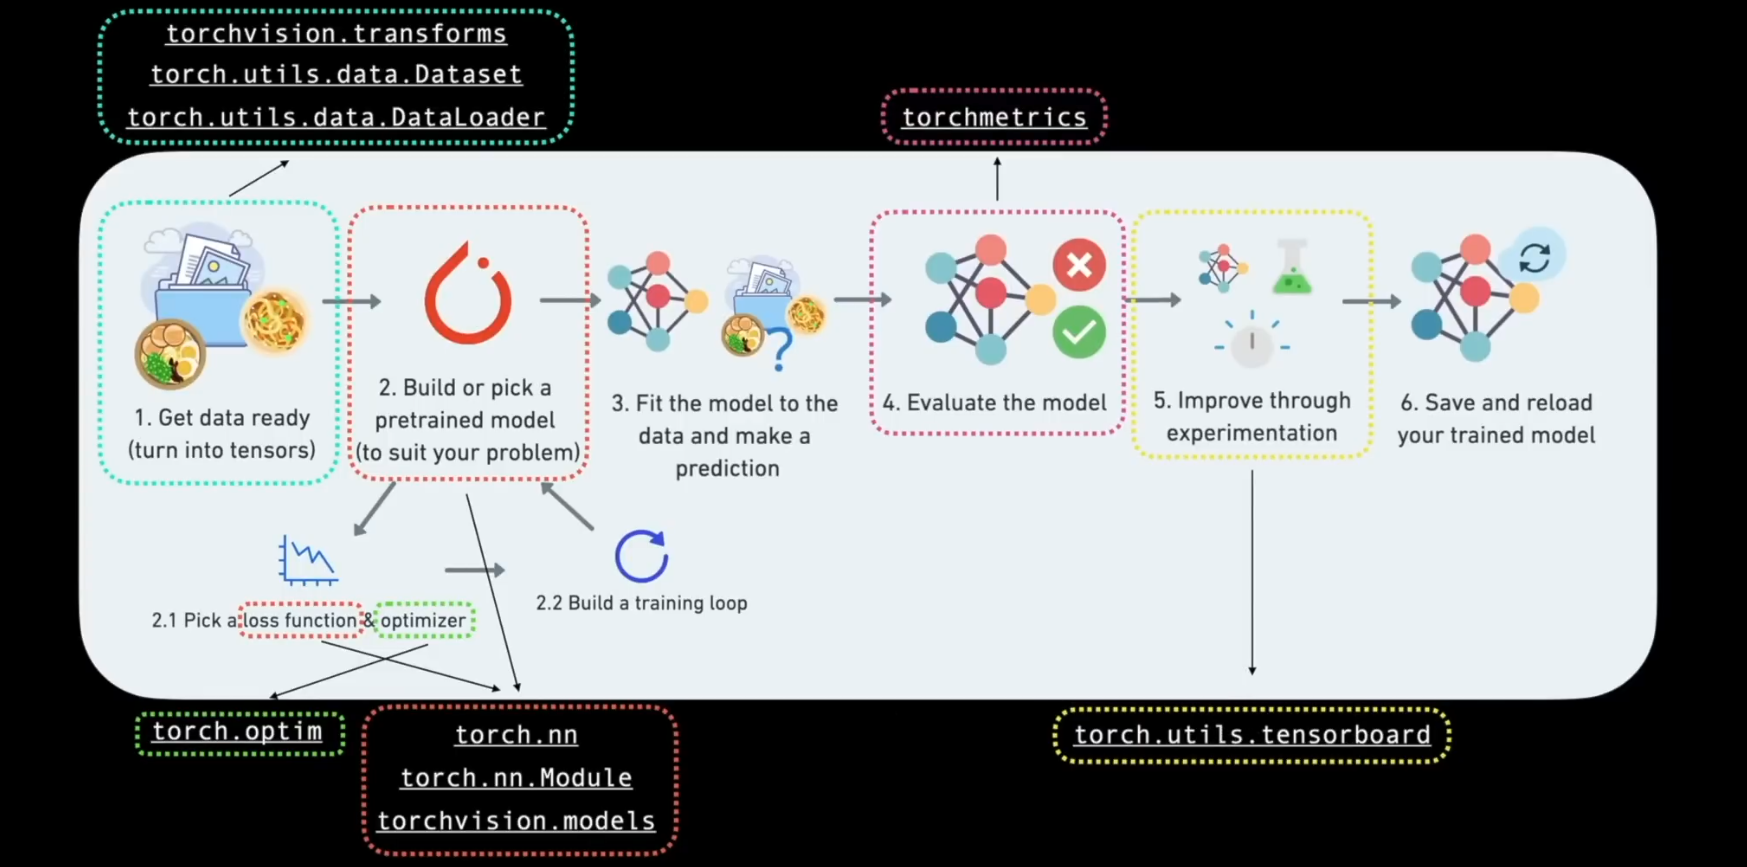

In [ ]:
what_were_covering = {1:"Data preparing",
                      2:"Build Model",
                      3:"Fitting the model to data(training)",
                      4:"Making predictions and evaluating a model",
                      5:"Saving and loading a model",
                      6:"Putting it all together"}
what_were_covering

{1: 'Data preparing',
 2: 'Build Model',
 3: 'Fitting the model to data(training)',
 4: 'Making predictions and evaluating a model',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu121'

# **◍ Data (preparing and loading)**

**Data can be any thing in machien learning:**
* Excel speadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

**Machine learning is a game of two parts:**

1. Turn your data, whatever it is, into numbers (a representation).
2. Build a model to learn the representation/patterns as best as possible.

>We'll use linear regression to create the data with known **parameters** (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using **gradient descent**.

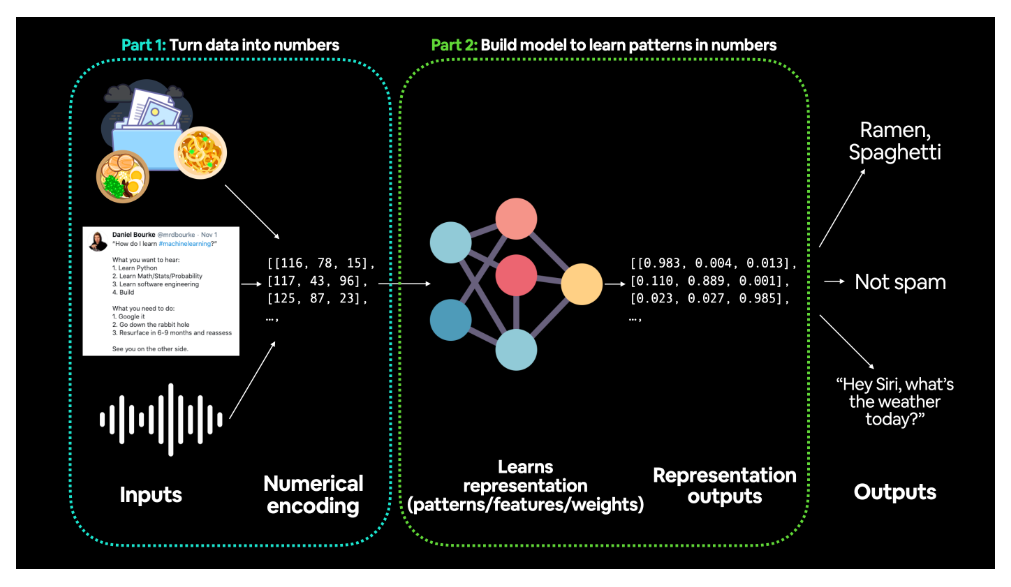

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5] ,y[:5] ,len(X) ,len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

## **🔸 Splitting data into train ,val ,test sets(Important concepts in machien learning)**

**Here are common techniques to achieve this:**   

**1. Simple Random Splitting**   
  * Randomly assign data points to training, validation, and test sets using ratios like 70-20-10 or 80-10-10.
  * **Tools:** `train_test_split` in **Scikit-learn**

**2. Stratified Splitting**  
  * Ensures class distributions in training, validation, and test sets are similar, particularly useful for imbalanced datasets.  
  * **Tools:** `train_test_split` with **stratify parameter**.

**3. K-Fold Cross-Validation**
  * Splits the dataset into `k` equally sized folds. Each fold acts as a validation set while others are used for training.  
  * Useful for ensuring model robustness without needing a fixed validation set.
  * **Tools:** `KFold or StratifiedKFold` in **Scikit-learn**.

**4. Grouped Splitting**
  * Ensures that all samples from the same group (e.g.customer ID or time series ID) appear `in only one split`.  
  * **Tools:** `GroupShuffleSplit` in **Scikit-learn**.

**5. Leave-One-Out Cross-Validation (LOOCV)**  
  * Each sample is used once as a validation set, and the rest form the training set. `Used for small datasets`.  
  * Computationally expensive for large datasets.  
  * **Tools:** `LeaveOneOut` in **Scikit-learn**.

**6. Automated Libraries**  
  * Libraries like **scikit-learn**, **TensorFlow Datasets**, or **PyTorch DataLoaders** simplify splitting while ensuring reproducibility.

**Tips:**

* **Random Seed:** Always use a fixed random seed (random_state) for **reproducibility**.
* **Ratios:** Choose ratios based on dataset size (e.g., **80-10-10** for large datasets, **60-20-20** for smaller ones).
* **Stratification:** Prefer stratified splitting when handling **imbalanced classes**.

In [3]:
train_size = int(0.8 * len(X))
X_train ,y_train = X[:train_size] ,y[:train_size]
X_test ,y_test   = X[train_size:] ,y[train_size:]
len(X_train) ,len(X_test) ,len(y_train) ,len(y_test)

(40, 10, 40, 10)

In [ ]:
X_train[:4] ,X_test[:3] ,y_train[:2] ,y_test[:2]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400]]),
 tensor([[0.3000],
         [0.3140]]),
 tensor([[0.8600],
         [0.8740]]))

In [22]:
def plot_prediction(X_train = X_train ,train_labels = y_train,
                    X_test = X_test ,test_labels = y_test ,predictions= None):
  # Make ploting
  plt.figure(figsize = (10,6) ,dpi = 80)
  # Plot training data
  plt.scatter(X_train , train_labels , color = 'b' ,s=5 ,label  ="Training data")
  # Plot testing data
  plt.scatter(X_test , test_labels , color = 'g' ,s=5 ,label  ="Testing data")

  if predictions is not None:
    # Plot predictions
    plt.scatter(X_test ,predictions ,color = 'black' ,marker = 's' ,s=20 ,label = "Predictions")
  # Show legend with font size 14
  plt.legend(prop = {"size":14} ,loc = "upper left")
  plt.grid()
  plt.show()

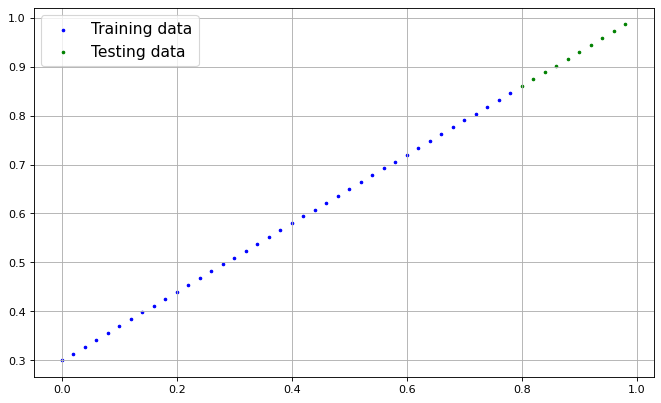

In [5]:
plot_prediction()

# **◍ Build Pytorch Model**

**PyTorch model building essentials**  

* **torch.nn:** Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).  

* **torch.nn.Parameter:**	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".    

* **torch.nn.Module:**	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.  

* **torch.optim:**	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).  

* **def forward():**	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).  

**What our model does:**
* Start with random values (wights & bias).
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal values (wights & bias values we used to create the data).

**How does it do so:**
 * Gradient descent.
 * Backpropagation.

>**Resource:** See more of these essential modules and their uses cases in the [PyTorch_Tutorials](https://pytorch.org/tutorials/beginner/ptcheat.html)

In [6]:
from torch import nn # Include the basic building blocks for graphs.

# Create Linear Regression Model Calss
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.weights = nn.Parameter(torch.randn(1 , # <- start with random weights (this will get adjusted as the model learns)
                                           requires_grad= True, # <- can we update this value with gradient descent?
                                           dtype = torch.float32))

    self.bais = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                         requires_grad=True, # <- can we update this value with gradient descent?
                                         dtype = torch.float32))

  # Declare Forward function to define the computation in the model
  # <- "x" is the input data (e.g. training/testing features)
  def forward(self ,X:torch.Tensor)->torch.Tensor:  # ->torch.Tensor This is a type hint indicating that the method returns a value of type torch.Tensor.
    return self.weights * X + self.bais # <- this is the linear regression formula (y = m*x + b)

## **🔸 Check model parameters.**

In [7]:
#Create Manual Random Seed
torch.manual_seed(42)

#Initilize Model
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
LinearModel  = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(LinearModel.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

**In PyTorch**, `state_dict()` is a method that belongs to `torch.nn.Module` and its subclasses (like our `LinearModel`). It returns a Python dictionary containing `the model's learnable parameters` and `their associated tensors`.

In [8]:
LinearModel.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

## **🔸 Making predictions using torch.inference_mode()**

**How check:**  
 * To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

* When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.


**torch.inference_mode vs torch.no_grad:**

* Both `torch.inference_mode` and `torch.no_grad` **disable gradient** computations, but they serve slightly different purposes and are used in different scenarios.

**Difference Between torch.no_grad and torch.inference_mode:**

1. **torch.no_grad :**

   * Disables gradient computation but still keeps **autograd metadata like version counters**, which are used for **operations like in-place modifications**.    
   * Slightly higher overhead compared to `torch.inference_mode`.

2. **torch.inference_mode:**

   * Disables gradient computation **and** autograd metadata tracking.  
   * Ideal for **inference-only workflows** where model weights and activations won't be modified.  
   * Provides better performance and memory usage than `torch.no_grad`.

**When to Use Which?**

* **Validation or testing during training:** Use `torch.no_grad` because it **still allows certain operations** related to **autograd** to function.   
* **Pure inference in production:** Use `torch.inference_mode` for **maximum performance and memory optimization**.

**Let's make some predictions.**

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


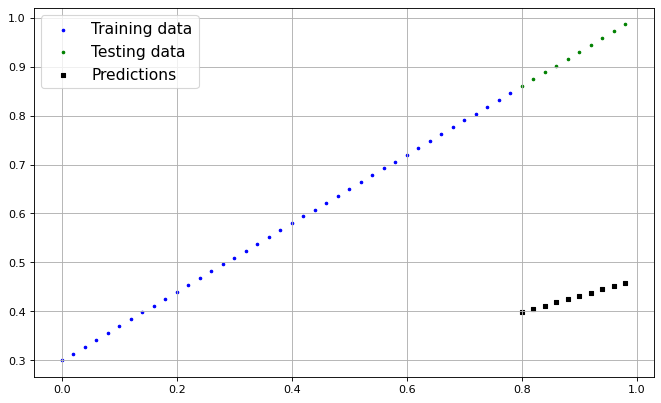

In [9]:
# We will use torch.infernce_mode() is faster and preferred about torch.no_grad()
with torch.inference_mode():
  y_predicted = LinearModel(X_test)

print(y_predicted)
plot_prediction(predictions=y_predicted)

# **◍ Train model**

**What about training model?**  
The whole idea of training is for moving model from **unkown** parameters to some **known** parameters.  
Or in another word from a **poor represntation** to a **better represntaion** of the data.  
One way to measure how poor or how wrong is to use **Loss function**.

**What we need to train model?**
* **Loss function:** A function to measure how wrong your **model's predictions** are to the **ideal/ground trouth outputs**, **lower loss** is **good**. https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optemizer:** Takes into account the loss of a model and adjust the model's parameters (in our case **weights** & **bais**) to improve loss function.
https://pytorch.org/docs/stable/optim.html

**What things we need in training loop?**   
*  **Looping in through the data and do....**
   1. **Forward Pass** by useing forward function `forward()`.
   2. **Clacualte the loss -> Train Loss** by useing loss function.
   3. **Optimizer zero grad.**
   4. **Backpropagation Loss backword.**
   5. **Optimizer Step ...(Update the optimizer (gradient descent)).**

**What things we need in testing loop?**   
*  **Looping in through the data and do....**  
   1. **Tarn off gradient** by use __torch.no_grad__ Or __torch.inference_mode__.  
   2. **Forward Pass** by useing forward function `forward()`.  
   3. **Claculate the Loss -> Test Loss** by useing loss function.  

## **🔸 Setup Loss Function and Optimizer.**

In [10]:
# Setup Loss Function
Loss_Fun = nn.L1Loss() # MAE (Mean Squared Error Loss)

# Setup an Optimizer(Stochsatic Gradient Descent)
optimizer = torch.optim.SGD(params = LinearModel.parameters() ,
                                                              lr = 1e-2,
                                                                        momentum=0.9)

## **🔸 Building Training Loop.**

In [13]:
import time
# Setup random seed
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data), this hyperparameter in ML.
epochs = 200

# Track model values
epochs_count = []
test_loss_values = []
train_loss_values = []

# Initialize a timer before the training loop
start_time = time.time()

## Traing Loop
for epoch in range(epochs):
  # Set the model in training Mode
  LinearModel.train()

  # 1. Forward Pass on train data using the forward() method inside
  train_pred = LinearModel(X_train)

  # 2. Claculate The Loss (input , traget)
  train_loss = Loss_Fun(train_pred ,y_train)
  #print(f"Traing Loss = {Loss :.5f}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation Loss backword
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  # Put the model in evaluation mode
  LinearModel.eval()

  # 1. Forward Pass
  with torch.inference_mode():
    test_pred  = LinearModel(X_test)

  # 2. Claculate Loss
  test_loss = Loss_Fun(test_pred ,y_test)

  # Show resultes per epoch
  if epoch % 10 == 0:
    # append model values
    epochs_count.append(epoch)
    test_loss_values.append(test_loss.detach().numpy()) # Convert from tensor to numpy array
    train_loss_values.append(train_loss.detach().numpy())

    # Calculate elapsed time
    elapsed_time = time.time() - start_time

    # print some values
    print(f"Epoch [{epoch+1}/{epochs}] [=================] - {elapsed_time:.2f}s/step - Train Loss: {train_loss.item():.4f} - Test loss: {test_loss.item():.4f}")
    print(LinearModel.state_dict(),"\n")

Epoch [1/200] [=================] - 0.02s/step - Train Loss: 0.3129 - Test loss: 0.4811
OrderedDict([('weights', tensor([0.3406])), ('bais', tensor([0.1388]))]) 

Epoch [11/200] [=================] - 0.03s/step - Train Loss: 0.1031 - Test loss: 0.0265
OrderedDict([('weights', tensor([0.4982])), ('bais', tensor([0.5061]))]) 

Epoch [21/200] [=================] - 0.04s/step - Train Loss: 0.0696 - Test loss: 0.1943
OrderedDict([('weights', tensor([0.4652])), ('bais', tensor([0.3147]))]) 

Epoch [31/200] [=================] - 0.05s/step - Train Loss: 0.0466 - Test loss: 0.0271
OrderedDict([('weights', tensor([0.5785])), ('bais', tensor([0.3811]))]) 

Epoch [41/200] [=================] - 0.06s/step - Train Loss: 0.0213 - Test loss: 0.0020
OrderedDict([('weights', tensor([0.6690])), ('bais', tensor([0.3293]))]) 

Epoch [51/200] [=================] - 0.06s/step - Train Loss: 0.0157 - Test loss: 0.0101
OrderedDict([('weights', tensor([0.7189])), ('bais', tensor([0.2730]))]) 

Epoch [61/200] [=

## **🔸 Build Prediction Function.**

In [11]:
# We will use torch.infernce_mode() is faster and preferred about torch.no_grad()
def predict(test_data):
  # Pure inference
  with torch.inference_mode():
    y_pred = LinearModel(test_data)
  # Return y_pred
  return y_pred

## **🔸 Visual 2 Curves to show How Loss Function play.**

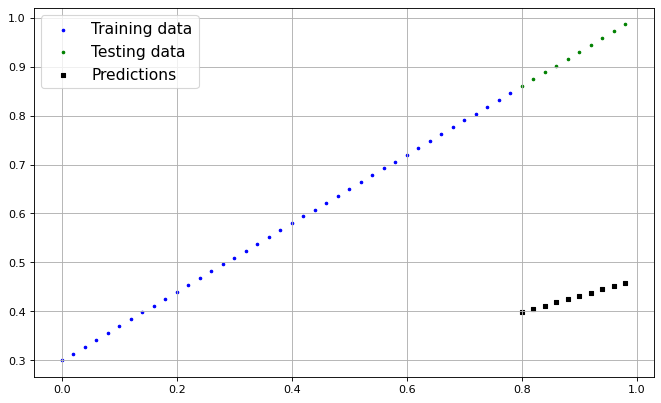

In [12]:
y_preds = predict(X_test)
plot_prediction(predictions=y_preds)

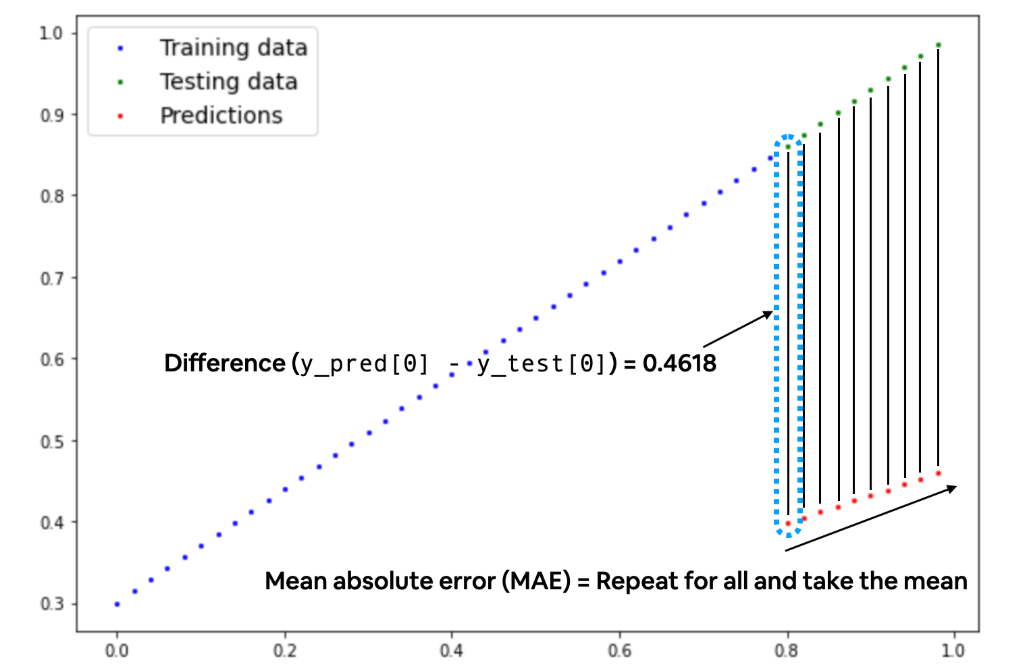

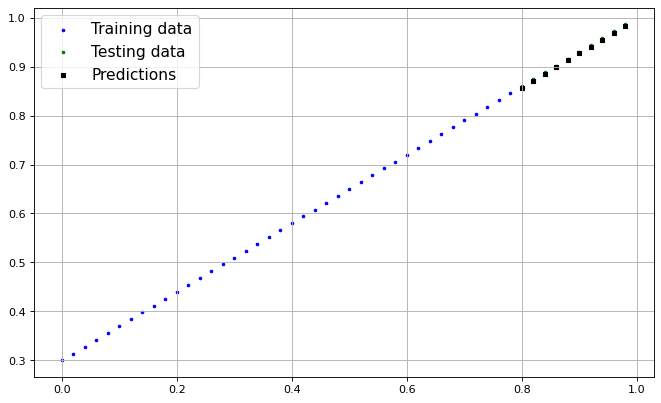

In [14]:
y_new_preds = predict(X_test)
plot_prediction(predictions=y_new_preds)

In [15]:
train_loss_values[:5] , test_loss_values[:5]

([array(0.31288138, dtype=float32),
  array(0.10313146, dtype=float32),
  array(0.06960087, dtype=float32),
  array(0.04656734, dtype=float32),
  array(0.02128556, dtype=float32)],
 [array(0.48106518, dtype=float32),
  array(0.02650516, dtype=float32),
  array(0.19430418, dtype=float32),
  array(0.02707852, dtype=float32),
  array(0.00196683, dtype=float32)])

## **🔸 Visuals Train and Test Losses Curves.**

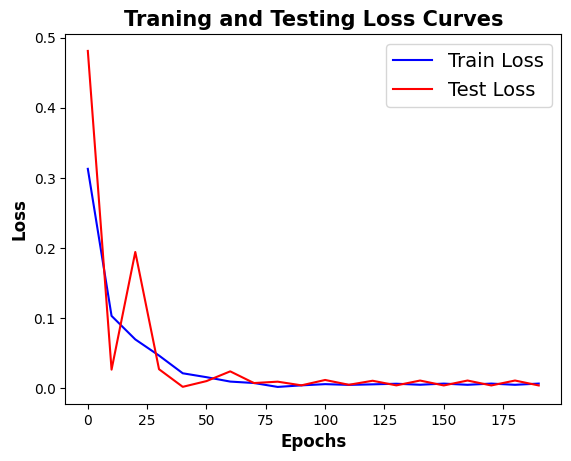

In [16]:
plt.plot(epochs_count ,train_loss_values ,color = 'b' ,label = "Train Loss")
plt.plot(epochs_count ,test_loss_values ,color = 'r' ,label = "Test Loss")
plt.ylabel("Loss" ,fontsize = 12 ,weight='bold')
plt.xlabel("Epochs" ,fontsize = 12 ,weight='bold')
plt.title("Traning and Testing Loss Curves" ,fontsize = 15 ,weight='bold')

plt.legend(prop = {"size":14},loc = "upper right")
#plt.tight_layout()
plt.show()

# **◍  Saving and Loading The model.**
There are three methods to __save__ and __load__ model in PyTorch.
* **torch.save():** - allows you save a PyTorch object in python pickle format.  
* **torch.load():** - allows you load a PyTorch saved object.
* **torch.nn.Module.load_state_dict():** - this allows to load a model's saved state dictionary.

**Let's see how we can do that in a few steps:**

* We'll create a __directory__ for saving models to called __Saved_Models__ using __Python's pathlib__ module.  
* We'll create a file path to save the model to.  
* We'll call __torch.save(obj, f)__ where __obj is the target__ model's `state_dict()` and __f is the filename__ of where to save the model.  
>**Note:** It's common convention for PyTorch saved models or objects to end with __.pt__ or __.pth__, like `saved_model_01.pth`.

## **🔸 Saving The Model.**

In [17]:
from google.colab import drive
drive.mount(r'/content/gdrive')

Mounted at /content/gdrive


In [19]:
from pathlib import Path

# 1. Create Models directory
MODEL_PATH = Path(r"/content/gdrive/MyDrive/Saved_Models")
MODEL_PATH.mkdir(parents=True ,exist_ok=True)

# 2. Create model save path
MODEL_NAME = "LinearRegressionModel_v1.pth"
MODEL_SAVED_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict
print(f"Saving model to :{MODEL_SAVED_PATH}")
torch.save(obj=  LinearModel.state_dict() ,f= MODEL_SAVED_PATH)

Saving model to :/content/gdrive/MyDrive/Saved_Models/LinearRegressionModel_v1.pth


## **🔸 Check For Saved Model.**

In [23]:
# Check for saved model
! ls -l /content/gdrive/MyDrive/Saved_Models

total 2
-rw------- 1 root root 1662 Dec 28 21:17 LinearRegressionModel_v1.pth


## **🔸 Loading The Saved Model.**


In [24]:
LinearModel.state_dict()

OrderedDict([('weights', tensor([0.7034])), ('bais', tensor([0.2938]))])

In [25]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
Loaded_Saved_Model_v1 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
Loaded_Saved_Model_v1.load_state_dict(torch.load(f = MODEL_SAVED_PATH ,weights_only=True))

<All keys matched successfully>

In [26]:
Loaded_Saved_Model_v1.state_dict()

OrderedDict([('weights', tensor([0.7034])), ('bais', tensor([0.2938]))])

## **🔸 Make Some Predictions.**

In [27]:
Loaded_Saved_Model_v1.eval()
with torch.inference_mode():
  loaded_model_preds = Loaded_Saved_Model_v1(X_test)

loaded_model_preds

tensor([[0.8565],
        [0.8706],
        [0.8847],
        [0.8987],
        [0.9128],
        [0.9269],
        [0.9409],
        [0.9550],
        [0.9691],
        [0.9831]])

In [28]:
y_new_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# **◍ Putting it all together (Using GPU instead of CPU).**

In [1]:
import torch
from torch import nn
from torch.nn import L1Loss
from torch.optim import SGD
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## **🔸 Create device-agnostic code:**

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [4]:
!nvidia-smi

Sat Dec 28 23:42:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **🔸 Preparing The Data.**

In [56]:
weights = 0.7
bais = 0.3

# Create ranges
start = 0
end = 1
step = 0.02

# Create X,y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bais
X[:5] , y[:5] , len(X) ,len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]),
 50,
 50)

In [57]:
# Split the data
train_split = int(0.8 * len(X))
X_train ,X_test = X[:train_split] ,X[train_split:]
y_train ,y_test= y[:train_split] ,y[train_split:]
len(X_train) ,len(X_test) ,len(y_train) ,len(y_test)

(40, 10, 40, 10)

In [58]:
def plot_prediction(X_train = X_train ,train_labels = y_train,
                    X_test = X_test ,test_labels = y_test ,predictions= None):
  # Make ploting
  plt.figure(figsize = (10,6) ,dpi = 80)
  # Plot training data
  plt.scatter(X_train , train_labels , color = 'b' ,s=5 ,label  ="Training data")
  # Plot testing data
  plt.scatter(X_test , test_labels , color = 'g' ,s=5 ,label  ="Testing data")

  if predictions is not None:
    # Plot predictions
    plt.scatter(X_test ,predictions ,color = 'black' ,marker = 's' ,s=20 ,label = "Predictions")
  # Show legend with font size 14
  plt.legend(prop = {"size":14} ,loc = "upper left")
  plt.grid()
  plt.show()

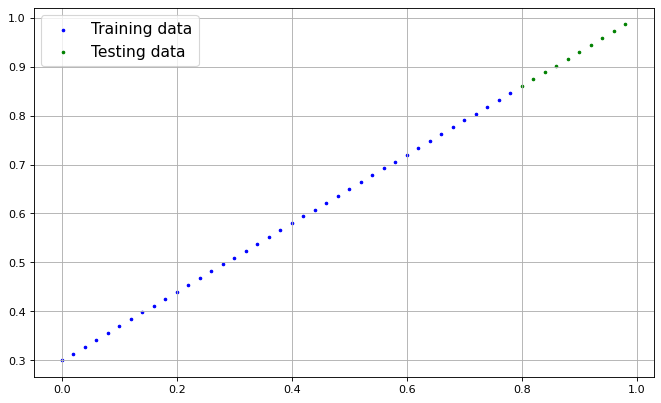

In [59]:
# Plot Data
# Note call function plot_predictions
plot_prediction()

## **🔸 Building a PyTorch Linear Model.**

In [66]:
class LinearRegressionModel_V2(nn.Module):
  def __init__(self):
    super(LinearRegressionModel_V2 ,self).__init__()
    self.Linear_layer = nn.Linear(in_features = 1,
                                                  out_features = 1)

  # Create Forward Function
  def forward(self, x :torch.Tensor)->torch.Tensor:
    return self.Linear_layer(x)

In [73]:
# Set Manual Seed
torch.manual_seed(42)
Linear_Model = LinearRegressionModel_V2()
Linear_Model ,Linear_Model.state_dict()

(LinearRegressionModel_V2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [68]:
# Check Model device
next(Linear_Model.parameters()).device

device(type='cpu')

In [74]:
# Set Model in GPU and check it
Linear_Model.to(device)
next(Linear_Model.parameters()).device

device(type='cuda', index=0)

## **🔸 Setup Loss Function and Optimizer.**

In [75]:
# Setup Loss Function
Loss_fun_v2 = nn.MSELoss()

# Setup Optimizer and use SGD Optimizer
optimizer_v2 = torch.optim.SGD(params = Linear_Model.parameters(),
                                                                  lr = 1e-2,
                                                                            momentum = 0.9)

## **🔸 Traning the Model.**

>**Note:** Put data on the available device ,Without this, error will happen (not all model/data on device)  
**RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm).**

In [76]:
import time

# Set random seed
torch.manual_seed(42)

# Declare number of epochs
epochs = 200

# Track model values
epochs_count = []
test_losses = []
train_losses = []

# Get train satrt time
start_time = time.time()

# Put data on the available device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Building training loop
for epoch in range(epochs):
  # Set train mode
  Linear_Model.train()

  # 1. Forward Pass
  y_preds = Linear_Model(X_train)

  # 2. Calculate the loss(input ,target)
  train_loss = Loss_fun_v2(y_preds , y_train)

  # 3. Optimizer zero_grad
  optimizer_v2.zero_grad()

  # 4. Loss backword
  train_loss.backward()

  # 5. Optimizer step
  optimizer_v2.step()

  ## Testing
  # Put the model in evaluation mode
  Linear_Model.eval()
  with torch.inference_mode():
    # Forward Pass
    test_preds = Linear_Model(X_test)
    # Calc test loss
    test_loss = Loss_fun_v2(test_preds ,y_test)

  if epoch % 10 == 0:
    # Apped Model values
    epochs_count.append(epoch)
    test_losses.append(test_loss.detach().cpu().numpy())
    train_losses.append(train_loss.detach().cpu().numpy())

    # Calculate elapsed time
    elapsed_time = time.time() - start_time

    print(f"Epoch [{epoch+1}/{epochs}] [=================] - {elapsed_time:.2f}ms/step - Train Loss: {train_loss.item():.5f} - Test Loss: {test_loss.item():.5f}")
    print(Linear_Model.state_dict(),"\n")

Epoch [1/200] [=================] - 0.00ms/step - Train Loss: 0.30844 - Test Loss: 0.32769
OrderedDict([('Linear_layer.weight', tensor([[0.7601]], device='cuda:0')), ('Linear_layer.bias', tensor([0.8189], device='cuda:0'))]) 

Epoch [11/200] [=================] - 0.32ms/step - Train Loss: 0.01567 - Test Loss: 0.00053
OrderedDict([('Linear_layer.weight', tensor([[0.6000]], device='cuda:0')), ('Linear_layer.bias', tensor([0.4112], device='cuda:0'))]) 

Epoch [21/200] [=================] - 0.33ms/step - Train Loss: 0.03290 - Test Loss: 0.07164
OrderedDict([('Linear_layer.weight', tensor([[0.5212]], device='cuda:0')), ('Linear_layer.bias', tensor([0.1917], device='cuda:0'))]) 

Epoch [31/200] [=================] - 0.34ms/step - Train Loss: 0.00458 - Test Loss: 0.01079
OrderedDict([('Linear_layer.weight', tensor([[0.5790]], device='cuda:0')), ('Linear_layer.bias', tensor([0.3041], device='cuda:0'))]) 

Epoch [41/200] [=================] - 0.36ms/step - Train Loss: 0.00355 - Test Loss: 0.000

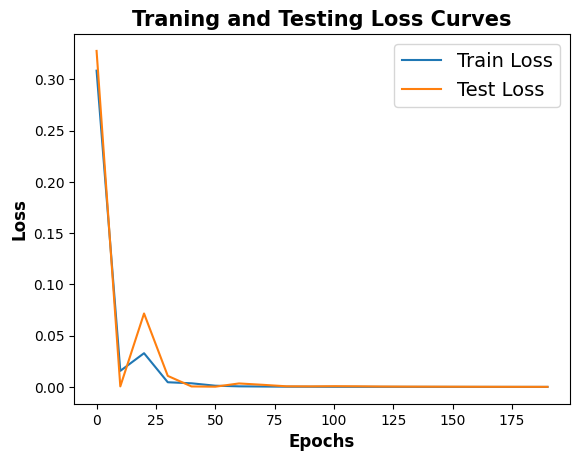

In [80]:
plt.plot(epochs_count ,train_losses ,label = "Train Loss")
plt.plot(epochs_count ,test_losses ,label = "Test Loss")
plt.ylabel("Loss" ,fontsize = 12 ,weight ="bold")
plt.xlabel("Epochs" ,fontsize = 12 ,weight ="bold")
plt.legend(prop = {"size":14} ,loc = "upper right")

plt.title("Traning and Testing Loss Curves" ,fontsize = 15 ,weight = "bold")
#plt.tight_layout()
plt.show()

## **🔸 Evaluating The Model.**

In [81]:
# Pure inference
Linear_Model.eval()
with torch.inference_mode():
  val_preds = Linear_Model(X_test)

val_preds

tensor([[0.8526],
        [0.8662],
        [0.8798],
        [0.8934],
        [0.9071],
        [0.9207],
        [0.9343],
        [0.9479],
        [0.9615],
        [0.9752]], device='cuda:0')

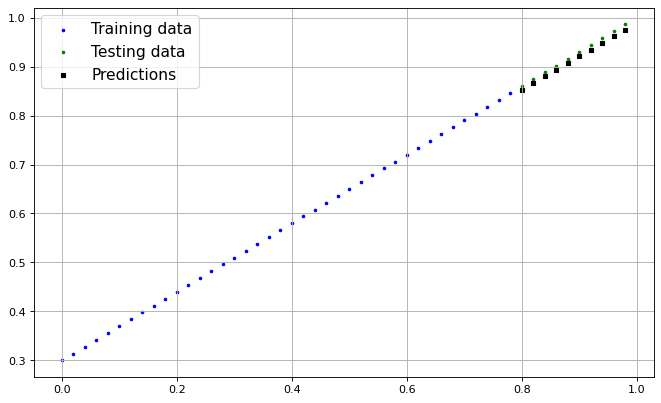

In [83]:
# Polting curves
# First Must convert tensor to work in cpu ,beacue matplotlib work with numpy in cpu mode
# Note: TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
plot_prediction(predictions=val_preds.cpu())

## 🔸 Saving The model.

In [85]:
from pathlib import Path

MODEL_PATH = Path(r"/content/drive/MyDrive/Saved_Models")

# 2. Create model save path
MODEL_NAME = "LinearRegressionModel_v2.pt"
MODEL_SAVED_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model state dict
print(f"Saving model to :{MODEL_SAVED_PATH}")
torch.save(obj = Linear_Model.state_dict() ,f = MODEL_SAVED_PATH )

Saving model to :/content/drive/MyDrive/Saved_Models/LinearRegressionModel_v2.pt


## **🔸 Loading The model.**

In [88]:
Linear_Model.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.6810]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.3077], device='cuda:0'))])

In [89]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
Loading_model_v2  = LinearRegressionModel_V2()

Loading_model_v2.load_state_dict(torch.load(f = MODEL_SAVED_PATH ,weights_only = True))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
Loading_model_v2.to(device)

LinearRegressionModel_V2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [95]:
next(Loading_model_v2.parameters()).device

device(type='cuda', index=0)

In [90]:
Loading_model_v2.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.6810]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.3077], device='cuda:0'))])

## 🔸 Evaluating The Model.

In [93]:
Loading_model_v2.eval()
with torch.inference_mode():
  loaded_v2_preds = Loading_model_v2(X_test)
loaded_v2_preds ,val_preds == loaded_v2_preds

(tensor([[0.8526],
         [0.8662],
         [0.8798],
         [0.8934],
         [0.9071],
         [0.9207],
         [0.9343],
         [0.9479],
         [0.9615],
         [0.9752]], device='cuda:0'),
 tensor([[True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True],
         [True]], device='cuda:0'))

# **Exercises :** Try to read quetion and answer it before read the solution. [PyTorch_WorkFolw_Quetions](https://colab.research.google.com/drive/1NmwN0K2ahsc-Adl6fOlNyQfUSy-Z_msm#scrollTo=8UGX3VebrVtI)

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>